In [ ]:
#필요한 라이브러리 불러오기
import numpy as np
import matplotlib.pyplot as pylab
from sklearn.metrics import pairwise_distances_argmin
from skimage.io import imread
from sklearn.utils import shuffle
from skimage import img_as_float
from google.colab import drive
drive.mount('/gdrive')

In [ ]:
from sklearn.datasets import fetch_olivetti_faces
import os
import matplotlib.image as mpimg
'''
face0 = os.listdir('/gdrive/My Drive/ColabNote/images/ARFaces')
print(face0)
face1=[]
faces=[]
check=0
for x in face0:
  if (check==5):
    faces.append(face1)
    face1=[]
    check=0
  else:
    face1.append(f'/gdrive/My Drive/ColabNote/images/ARFaces/{x}')
    check+=1
  

'''
faces=[] #학습 데이터
faces1=[] # 테스트 데이터
face1=[] #테스트 아이디 튜플로 저장 
for m in range(1,10):

  for n in range(1,6):
    face1.append((m,n))
    img=f'/gdrive/My Drive/ColabNote/images/ARFaces/mpeg_000{m}_000{n}.BMP'
    img1=mpimg.imread(img)
    #face0.append(img1)
    faces1.append(img1) #테스트용
  face0=[]
for m in range(10,36):

  for n in range(1,6):
    face1.append((m,n))
    img=f'/gdrive/My Drive/ColabNote/images/ARFaces/mpeg_00{m}_000{n}.BMP'
    img1=mpimg.imread(img)
    #face0.append(img1)
    faces1.append(img1)#테스트용
  face0=[]
for m in range(36,100):

  for n in range(1,6):
    img=f'/gdrive/My Drive/ColabNote/images/ARFaces/mpeg_00{m}_000{n}.BMP'
    img1=mpimg.imread(img)
    #face0.append(img1)
    faces.append(img1)#학습용
  face0=[]
for m in range(100,116):

  for n in range(1,6):
    img=f'/gdrive/My Drive/ColabNote/images/ARFaces/mpeg_0{m}_000{n}.BMP'
    img1=mpimg.imread(img)
    #face0.append(img1)
    faces.append(img1)#학습용
  face0=[]

for m in range(116,151):

  for n in range(1,6):
    face1.append((m,n))
    img=f'/gdrive/My Drive/ColabNote/images/ARFaces/mpeg_0{m}_000{n}.BMP'
    img1=mpimg.imread(img)
    #face0.append(img1)
    faces1.append(img1)#테스트용
  face0=[]
for m in range(151,231):

  for n in range(1,6):
    img=f'/gdrive/My Drive/ColabNote/images/ARFaces/mpeg_0{m}_000{n}.BMP'
    img1=mpimg.imread(img)
    #face0.append(img1)
    faces.append(img1)#학습용
  face0=[]

for m in range(231,271):

  for n in range(1,6):
    face1.append((m,n))
    img=f'/gdrive/My Drive/ColabNote/images/ARFaces/mpeg_0{m}_000{n}.BMP'
    img1=mpimg.imread(img)
    #face0.append(img1)
    faces1.append(img1)#테스트용
  face0=[]
print(faces)
print(face1)


[array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 254, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), array([[255, 255, 255, ..., 230, 255, 255],
       [255, 255, 255, ...,  98, 254, 255],
       [255, 255, 255, ...,  64, 198, 255],
       ...,
       [255, 255, 255, ..., 161, 255, 254],
       [255, 255, 255, ...,  47, 222, 255],
       [255, 255, 255, ...,  39, 102, 254]], dtype=uint8), array([[255, 255, 255, ...,  33, 139, 255],
       [255, 255, 255, ...,  24,  57, 240],
       [255, 255, 255, ...,  28,  29, 103],
       ...,
       [255, 255, 255, ...,  37,  39, 108],
       [255, 255, 255, ...,  37,  42,  53],
       [255, 255, 255, ...,  35,  42,  39]], dtype=uint8), array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 252, 255, 

(800, 2576)


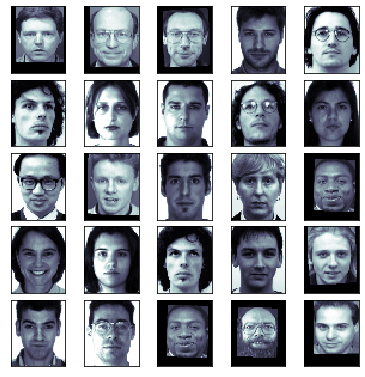

In [ ]:
faces=np.array(faces)
faces1=np.array(faces1)
faces=np.reshape(faces,(800,2576))
faces1=np.reshape(faces1,(550,2576))
print(faces.shape) # (56,46)
fig = pylab.figure(figsize=(5,5))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.1, wspace=0.1)

# 25개 랜덤 얼굴 영상 표시
j=1
np.random.seed(0)
for i in np.random.choice(range(faces.shape[0]), 25):
    ax = fig.add_subplot(5, 5, j, xticks=[], yticks=[])
    face = np.reshape(faces[i,:],(56,46))
    ax.imshow(face, cmap='bone', interpolation='nearest')
    j += 1
pylab.show()

(800, 400)


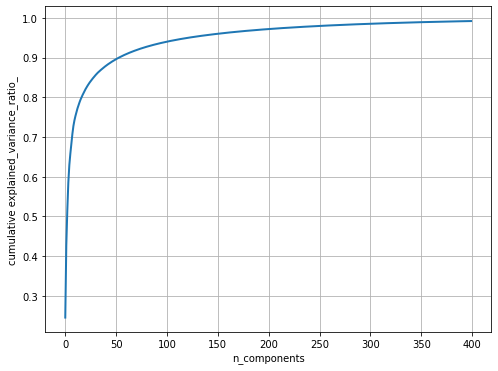

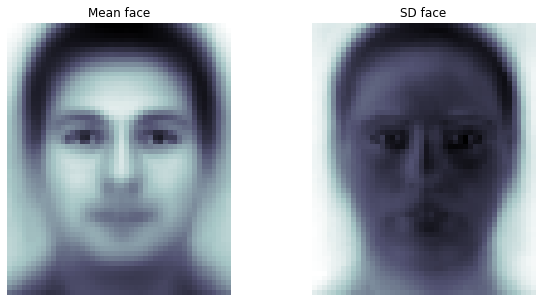

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

n_comp = 400 #(주성분 갯수)
pipeline=Pipeline([('scaling', StandardScaler()), ('pca',PCA(n_comp))])
faces_proj = pipeline.fit_transform(faces)
print(faces_proj.shape) 

mean_face=np.reshape(pipeline.named_steps['scaling'].mean_, (56,46)) # 각 얼굴 인덱스(화소)별 평균
sd_face=np.reshape(np.sqrt(pipeline.named_steps['scaling'].var_), (56,46)) # 각 얼굴 화소 - 해당 화소/인덱스의 평균 -> 얼굴의 차이값 

#faces_proj.shape
#variance_ratio



pylab.figure(figsize=(8,6))
variance_ratio=pipeline.named_steps['pca'].explained_variance_ratio_ # variance 누적합을 구해서 
pylab.plot(np.cumsum(variance_ratio), linewidth=2)
pylab.grid(),pylab.axis('tight'),pylab.xlabel('n_components')
pylab.ylabel('cumulative explained_variance_ratio_')
pylab.show() # 차트를 보여준다.


pylab.figure(figsize=(10,5))
pylab.subplot(121), pylab.imshow(mean_face,cmap='bone')
pylab.axis('off'), pylab.title('Mean face')
pylab.subplot(122), pylab.imshow(sd_face,cmap='bone')
pylab.axis('off'), pylab.title('SD face')
pylab.show()

#비교할게 너무 많아서 차원을 축소해야함 이때 파이썬에서 최대한 줄일 수 있는 차원은 400개까지 
#따라서 400가지를 가지고 주성분 분석 400차원으로 만들어서 프로제션시킴

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pca = PCA(0.9)
pca.fit(faces)
print(pca.n_components)
print(pca.n_components_)#주성분 개수
n_comp = 43 #주성분 개수
pipeline=Pipeline([('scaling', StandardScaler()), ('pca',PCA(n_comp))])
faces_proj = pipeline.fit_transform(faces)
print(faces_proj.shape) # 800*43

mean_face=np.reshape(pipeline.named_steps['scaling'].mean_, (56,46)) # 각 얼굴 인덱스(화소)별 평균
sd_face=np.reshape(np.sqrt(pipeline.named_steps['scaling'].var_), (56,46)) # 각 얼굴 화소 - 해당 화소/인덱스의 평균 -> 얼굴의 차이값 

#faces_proj.shape
variance_ratio


0.9
43
(800, 43)


array([2.45145651e-01, 1.81391867e-01, 8.83633724e-02, 7.03333926e-02,
       4.42197107e-02, 2.87375717e-02, 2.55833267e-02, 2.39105301e-02,
       1.98640220e-02, 1.40380789e-02, 1.11307396e-02, 9.77556056e-03,
       9.31700403e-03, 7.98456128e-03, 7.28914000e-03, 6.82433599e-03,
       5.93022545e-03, 5.62386573e-03, 5.25857181e-03, 5.06331206e-03,
       4.94897405e-03, 4.53397369e-03, 4.08033853e-03, 4.02449277e-03,
       3.73467550e-03, 3.45223463e-03, 3.38659792e-03, 3.26411862e-03,
       3.17147997e-03, 3.10672346e-03, 2.86173268e-03, 2.79078718e-03,
       2.65229876e-03, 2.43297621e-03, 2.27435693e-03, 2.23634319e-03,
       2.20232781e-03, 2.13672366e-03, 2.09682534e-03, 2.01850731e-03,
       1.96875313e-03, 1.90819746e-03, 1.85227723e-03, 1.78545805e-03,
       1.72092544e-03, 1.66349121e-03, 1.65033545e-03, 1.59467289e-03,
       1.54901478e-03, 1.52347325e-03, 1.46652775e-03, 1.45815881e-03,
       1.35114030e-03, 1.33751553e-03, 1.32196024e-03, 1.27619424e-03,
      

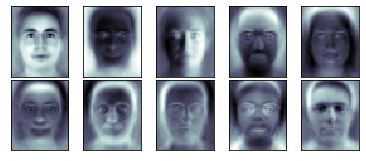

array([0.03145393, 0.03100374, 0.02997707, ..., 0.02616124, 0.02676891,
       0.02707149])

In [ ]:
fig = pylab.figure(figsize=(5,2))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(10):
  face =np.reshape(pipeline.named_steps['pca'].components_[i,:],(56,46))
  ax=fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
  ax.imshow(face,cmap='bone', interpolation='nearest')

pylab.show()

pipeline.named_steps['pca'].components_[1,:] # 첫번째 고유얼굴의 variation

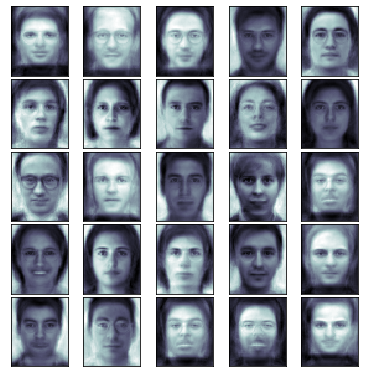

In [ ]:
faces_inv_proj=pipeline.named_steps['pca'].inverse_transform(faces_proj)
faces_inv_proj=np.reshape(faces_inv_proj, (800,56,46))

fig=pylab.figure(figsize=(5,5))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

j=1
np.random.seed(0)
for i in np.random.choice(range(faces.shape[0]), 25):
  reconst_face=mean_face+sd_face*faces_inv_proj[i,:] #공분산을 시켜서 공분산 시킨 값으로 주성분을 활용하여 얼굴을 재조립 i번째 얼굴의 특징을 분산만큼 반영
  #reconst_face=faces_inv_proj[i,:] #주성분 분석을 이용한 얼굴의 특징백터
  #reconst_face: 학습데이터/ 학습 얼굴 이미지
  #faces_inv_proj[i,:]=sd_face'(reconst_face-mean_face) i번째 얼굴의 특징벡터
  #테스트 데이터(새로운 데이터)의 특징벡터 =pipeline.named_steps['pca'].components_[i,:] *sd_face'*(quface-mean_face)
  ax=fig.add_subplot(5,5,j,xticks=[],yticks=[])
  ax.imshow(reconst_face, cmap='bone', interpolation='nearest')
  j+=1
pylab.show() # 오리지널 이미지보다 흐릿하다 (오리지널 이미지는 모든 이미지에 대해서 주성분(400개) 분석, but 43개의 차원만 활용했으므로 더 흐릿함)

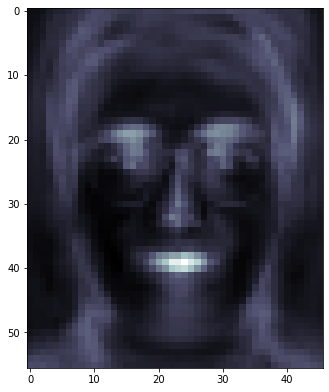

[[0.00896685 0.00899133 0.00989481 ... 0.01414819 0.01132105 0.00996038]
 [0.00916965 0.00945674 0.01118293 ... 0.015662   0.01255793 0.01038544]
 [0.00908912 0.01000791 0.01159691 ... 0.01651921 0.01329754 0.01098183]
 ...
 [0.0171219  0.01884479 0.02029962 ... 0.02075159 0.01910501 0.01898667]
 [0.02235799 0.02325868 0.02269088 ... 0.02424629 0.02230344 0.02100875]
 [0.02499512 0.0244272  0.02545319 ... 0.02613604 0.0249449  0.0236643 ]]


In [ ]:
# 고유분해
#원본/재구성얼굴= 고유얼굴1의 variation * 고유얼굴1 + 고유얼굴2의 variation * 고유얼굴2 + ...

od=0
a=1
for i in range(43):
  face2 =np.reshape(pipeline.named_steps['pca'].components_[i,:],(56,46))
  variance =np.reshape(pipeline.named_steps['pca'].components_[i,:],(56,46))
  od+=face2*variance #원본/재구성얼굴= 고유얼굴1의 variation * 고유얼굴1 + 고유얼굴2의 variation * 고유얼굴2 + ...
  a+=1
fig = pylab.figure(figsize=(5,5))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
ax=fig.add_subplot(111)
ax.imshow(od, cmap='bone', interpolation='nearest')
pylab.show()
print(od)


In [ ]:
# identification
from scipy.spatial import distance
newfaces_proj = pca.transform(faces1) #특징벡터

distance_list  = []
min=100000000
minid=-1
c=0
for i in range(550):
  line = []
  if (face1[i][1]==1):

    for j in range(550):
      if(i==j):
        continue
      elif(face1[j][1]!=1):
        dst = distance.euclidean(newfaces_proj[i], newfaces_proj[j])
        if(dst<min):
          min=dst       #최소인 거리 저장
          minid=j       #거리가 최소일때의 아이디 저장
        line.append(dst)
        distance_list.append(line)
        #print(face1[j])
    #print("기준 : ",face1[i])
    #print(min)
    #print(face1[minid])
    if (face1[minid][0]==face1[i][0]):    #최소인 것의 아이디가 원본의 아이디와 일치할때 체크
      c+=1
    else:   #최소인 것의 아이디와 원본의 아이디가 일치하지 않을때 출력
      print("기준 : ",face1[i])
      print(min)
      print(face1[minid])
  else:
    continue
  min=100000000
  minid=-1      #아이디와 거리값 리셋
print("identification accuracy",c/110*100,"%") #거리가 최소인 것의 아이디와 원본의 아이디가 일치하는 경우의 확률 출력



기준 :  (5, 1)
1341.710084915787
(18, 2)
기준 :  (12, 1)
1068.7311027312016
(31, 2)
기준 :  (34, 1)
2066.99613012621
(242, 2)
기준 :  (141, 1)
2049.0168419238194
(132, 3)
기준 :  (146, 1)
1434.8596491390483
(18, 3)
기준 :  (231, 1)
1867.8627689855266
(127, 5)
기준 :  (239, 1)
2031.1029320540138
(232, 3)
기준 :  (252, 1)
1780.5373515001197
(260, 4)
identification accuracy 92.72727272727272 %


In [ ]:
distance_list  = []
min=100000000
max=0

for i in range(550):
  line = []
  for j in range(550):
    if(i==j):
      continue
    else:
      dst = distance.euclidean(newfaces_proj[i], newfaces_proj[j])
      if(dst<min):
        min=dst
      if(dst>max):
        max=dst


#거리의 최대 최솟값을 구한다

print(min)
print(max)

0.0
9637.75977718372


In [ ]:
th1=max*0.1
th2=max*0.2
th3=max*0.3
th4=max*0.4
th5=max*0.5
th6=max*0.6
th7=max*0.7
th8=max*0.8
th9=max*0.9
th10=max
th=[]
#print(th1)
th.append(th1)
th.append(th2)
th.append(th3)
th.append(th4)
th.append(th5)
th.append(th6)
th.append(th7)
th.append(th8)
th.append(th9)
th.append(th10)   #거리의 최대최솟값을 활용한 임계치 10등분

#FRR 오거부율
c=0
m=0
for x in th:

  for i in range(550):
    if (face1[i][1]==1):
      for j in range(550):
        if(i==j):
          continue
        elif(face1[i][0]==face1[j][0]):   #아이디가 일치하는 경우
          dst = distance.euclidean(newfaces_proj[i], newfaces_proj[j])    #거리
          if(dst>x):    #아이디가 일치하는데 임계치보다 거리가 클때 (오거부)
            c+=1
  m=c/440   #4*110
  print("임계치 : ",x," FRR",m*100,"%")
  c=0
  m=0




임계치 :  963.7759777183721  FRR 82.5 %
임계치 :  1927.5519554367443  FRR 45.68181818181819 %
임계치 :  2891.327933155116  FRR 18.863636363636363 %
임계치 :  3855.1039108734885  FRR 2.5 %
임계치 :  4818.87988859186  FRR 1.3636363636363635 %
임계치 :  5782.655866310232  FRR 0.9090909090909091 %
임계치 :  6746.431844028604  FRR 0.6818181818181818 %
임계치 :  7710.207821746977  FRR 0.45454545454545453 %
임계치 :  8673.98379946535  FRR 0.0 %
임계치 :  9637.75977718372  FRR 0.0 %


In [ ]:
#FAR 오수락율
c=0
m=0

for x in th:

  for i in range(550):
    if (face1[i][1]==1):
      for j in range(550):
        if(i==j):
          continue
        elif(face1[i][0]!=face1[j][0]):   #아이디가 일치하지 않는 경우
          if(face1[j][1]!=1):
            dst = distance.euclidean(newfaces_proj[i], newfaces_proj[j])      #거리
            if(dst<x):    #아이디가 일치하지 않는데 임계치보다 거리가 작은 경우 (오수락)
              c+=1
  m=c/47960     #(440-4)*110
  print("임계치 : ",x,"FAR",m*100,"%")
  m=0
  c=0


임계치 :  963.7759777183721 FAR 0.0 %
임계치 :  1927.5519554367443 FAR 0.6442869057547956 %
임계치 :  2891.327933155116 FAR 8.171392827356131 %
임계치 :  3855.1039108734885 FAR 28.882402001668055 %
임계치 :  4818.87988859186 FAR 60.554628857381154 %
임계치 :  5782.655866310232 FAR 87.75646371976647 %
임계치 :  6746.431844028604 FAR 97.6021684737281 %
임계치 :  7710.207821746977 FAR 99.54336947456214 %
임계치 :  8673.98379946535 FAR 99.94787322768974 %
임계치 :  9637.75977718372 FAR 99.9979149291076 %
